# 小規模企業共済

 * http://www.smrj.go.jp/kyosai/skyosai/about/proceed/index.html
 * https://www.smrj.go.jp/kyosai/skyosai/about/proceed/frr94k000000fm41.html
 * http://www.smrj.go.jp/doc/kyosai/s_seido_shiori.pdf
 
を読んで、コードにします。


## 共済金

[小規模企業共済法施行令 別表第一](https://elaws.e-gov.go.jp/search/elawsSearch/elaws_search/lsg0500/detail?lawId=340CO0000000185&openerCode=1)を[エクセル](table1.xlsx)にコピペして漢数字を置換。

エクセルを読んで DataFrame を作る。

In [6]:
%matplotlib inline

import pandas as pd

table1_book = pd.ExcelFile('table1.xlsx')
table1_text_df = table1_book.parse(0, skipfooter = 1)
table1_text_df


,第1欄,第2欄,第3欄,第4欄
0,36月,18370円,18250円,14888円
1,37月,18890円,18760円,15320円
2,38月,19420円,19280円,15752円
3,39月,19940円,19800円,16184円
4,40月,20470円,20320円,16624円
5,41月,20990円,20830円,17056円
6,42月,21520円,21350円,17488円
7,43月,22040円,21870円,17920円
8,44月,22570円,22390円,18360円
9,45月,23090円,22900円,18792円


共済金には、基本共済金と付加共済金がある。

```
共済金 = 基本共済金 + 付加共済金
```

ただし、付加共済金はほぼゼロなので省略。基本共済金だけ見る。

しおり (PDF) の p11 〜 に基本共済金の詳細がある。上記、別表第一の、

 * **第2欄**が共済金A (廃業・死亡) の金額。毎月 500 円ずつ払うといくら戻ってくるか。6か月未満は掛け捨て。36か月未満は掛金と同額。
 * **第3欄**が共済金B (老齢給付) の金額。180ヶ月以上、65 歳以上になって廃業せずに共済金を受け取るような場合。
 * **第4欄**が準共済金？ 12か月未満は掛け捨て。222か月(18年6か月)までは、掛金と同額。それ以降は、共済金B の 91%。

とりあえずグラフにしてみる。微妙にふにゃふにゃしてる。

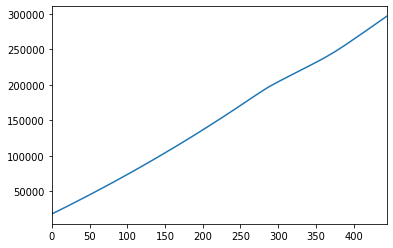

In [7]:
table1_text_df['第2欄'].str.replace('円', '').astype('i').plot()

表から「月」「円」を除去して数値に変換し、全てをグラフに出力する。

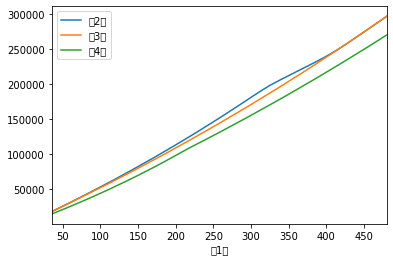

In [9]:
table1_df = table1_text_df.applymap(lambda x: int(x.replace('円', '').replace('月', '')))
table1_df.plot(x=0)

前月と比べて、いくら増えているか (`diff`) をグラフにしてみる。

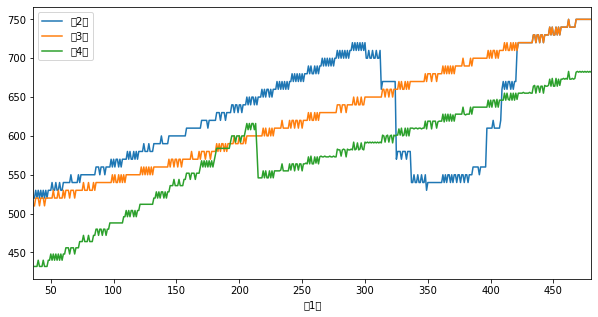

In [11]:
mon_df = table1_df.loc[:, ["第1欄"]]
num_df = table1_df.loc[:, ["第2欄", "第3欄", "第4欄"]]

pd.concat([mon_df, num_df.diff()], axis=1).plot(x=0, figsize=(10, 5))

この数字はどうやって出されているのか。

http://www.smrj.go.jp/doc/kyosai/s_seido_shiori.pdf P.14 によると、

> ③共済金Ａの額は、概ね 25 年目までに共済事由が生じた場合は、掛金を約 1.5％の率で複利運用した元利合計額となり、概ね 25 年目以降 35 年目までの間に共済事由が生じた場合は 1.5％から 1.0％に向けて段階的に低下し、35 年目以降共済事由が生じた場合は概ね 1.0％に見合ったものとなります。

25 年目までは 500 円を複利で 1.5 % で運用した額と概ね一致するとのこと。「元利合計」は元金と利子の合計の意味。

本当に一致するのか、複利 1.5% のグラフを描いてみる。

まず最初に、1.5% は年利のようなので月利に変換する。以下の記事を参考にした。

 * https://mathwords.net/geturi#i-4


In [28]:
# 年利 1.5 % を月利に変換
mi = (1 + 0.015) ** (1 / 12.0) - 1

print("年利 1.5% は月利 {:.3f} %。".format(mi * 100))

年利 1.5% は月利 0.124 %。


500 円足して月利を掛ける計算を 300 回 (25年分) ループする。

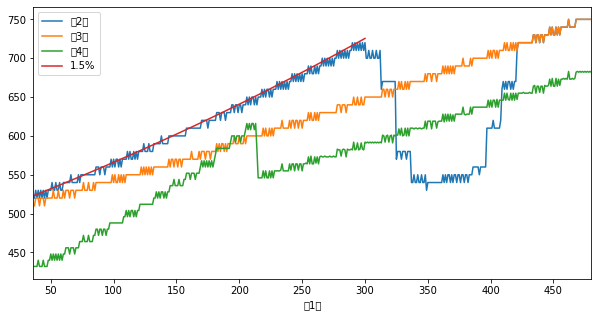

In [23]:
# 掛金 500 円を上の月利で 25 年 (300ヶ月) 運用した場合
total = 0
p15_array = []
for i in range(300):
    # 500 円入金
    total += 500
    # 月利を掛ける
    total *= 1 + mi
    
    # 別表1に合わせて、36ヶ月目からのデータを出す
    if i >= 35:
        p15_array.append(total)

# 複利 1.5 % の DataFrame を作成、元の表と結合、グラフ描画
tmp_df = pd.DataFrame({'1.5%': p15_array})
tmp_df = pd.concat([num_df.diff(), tmp_df.diff()], axis=1)
pd.concat([mon_df, tmp_df], axis=1).plot(x=0, figsize=(10, 5))
